## Explorando dados sobre candidaturas das eleições 2022: traçando perfil dos candidatos Brasileiros

Nosso objetivo é traçar um perfil dos candidatos nas eleições 2022 a partir de uma análisa exploratória. Além disto, buscamos aqui construir um modelo de clusterização para identificar similaridade entre os partidos em relação ao perfil declarado dos seus quadros pollíticos.

Os dados foram extraídos do portal TSE, para acessar [clique aqui](https://sig.tse.jus.br/ords/dwapr/seai/r/sig-eleicao/home?session=4781959940366).

## Conhecendo nossos dados

Importando principais bibliotecas

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importando dados

In [178]:
dados = pd.read_csv('candidatos.csv', encoding = 'latin-1', delimiter=';')
dados.head()

,ds_cargo,nm_coligacao,ds_cor_raca,ds_estado_civil,ds_grau_instrucao,nm_ue,ds_nacionalidade,ds_ocupacao,st_reeleicao,ds_sexo,sg_partido,ds_sit_tot_turno,nm_tipo_eleicao,nr_turno,sg_uf,qt_candidato,dt_carga
0,1º Suplente,PELA BAHIA;PELO BRASIL,Branca,Casado(a),Superior completo,BAHIA,Brasileira nata,Contador,N,Masculino,PT,#NULO#,Eleição Ordinária,1,BA,"1,0",2022-08-29 19:00:16
1,1º Suplente,A FORCA DO POVO,Branca,Casado(a),Superior completo,AMAZONAS,Brasileira nata,Advogado,N,Feminino,PSDB,#NULO#,Eleição Ordinária,1,AM,"1,0",2022-08-29 19:00:16
2,1º Suplente,A FORÇA DO BEM,Parda,Casado(a),Superior completo,MATO GROSSO,Brasileira nata,Servidor Público Federal,N,Masculino,DC,#NULO#,Eleição Ordinária,1,MT,"1,0",2022-08-29 19:00:16
3,1º Suplente,A FORÇA DO POVO,Parda,Casado(a),Superior completo,PIAUÍ,Brasileira nata,Sociólogo,N,Feminino,PT,#NULO#,Eleição Ordinária,1,PI,"1,0",2022-08-29 19:00:16
4,1º Suplente,A PARAIBA TEM PRESSA DE SER FELIZ,Parda,Casado(a),Superior completo,PARAÍBA,Brasileira nata,Deputado,N,Masculino,PT,#NULO#,Eleição Ordinária,1,PB,"1,0",2022-08-29 19:00:16


Verificando estrutura da base

In [179]:
dados.shape

(26843, 17)

Verificadno NA's

In [180]:
dados.isnull().sum()

# Não precisaremos de maiores tratamentos

ds_cargo             0
nm_coligacao         0
ds_cor_raca          0
ds_estado_civil      0
ds_grau_instrucao    0
nm_ue                0
ds_nacionalidade     0
ds_ocupacao          0
st_reeleicao         0
ds_sexo              0
sg_partido           0
ds_sit_tot_turno     0
nm_tipo_eleicao      0
nr_turno             0
sg_uf                0
qt_candidato         0
dt_carga             0
dtype: int64

Verificando tipagem dos dados

In [181]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26843 entries, 0 to 26842
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ds_cargo           26843 non-null  object
 1   nm_coligacao       26843 non-null  object
 2   ds_cor_raca        26843 non-null  object
 3   ds_estado_civil    26843 non-null  object
 4   ds_grau_instrucao  26843 non-null  object
 5   nm_ue              26843 non-null  object
 6   ds_nacionalidade   26843 non-null  object
 7   ds_ocupacao        26843 non-null  object
 8   st_reeleicao       26843 non-null  object
 9   ds_sexo            26843 non-null  object
 10  sg_partido         26843 non-null  object
 11  ds_sit_tot_turno   26843 non-null  object
 12  nm_tipo_eleicao    26843 non-null  object
 13  nr_turno           26843 non-null  int64 
 14  sg_uf              26843 non-null  object
 15  qt_candidato       26843 non-null  object
 16  dt_carga           26843 non-null  objec

Retirando colunas que não serão usadas

In [182]:
dados.drop('ds_nacionalidade',inplace=True, axis=1)
dados.drop('ds_sit_tot_turno',inplace=True, axis=1)
dados.drop('nm_tipo_eleicao',inplace=True, axis=1)
dados.drop('dt_carga',inplace=True, axis=1)
dados.drop('qt_candidato',inplace=True, axis=1)
dados.drop('nr_turno',inplace=True, axis=1)


Verificando o resultado da operação acima:

In [183]:
dados.columns

Index(['ds_cargo', 'nm_coligacao', 'ds_cor_raca', 'ds_estado_civil',
       'ds_grau_instrucao', 'nm_ue', 'ds_ocupacao', 'st_reeleicao', 'ds_sexo',
       'sg_partido', 'sg_uf'],
      dtype='object')

## Análise Exploratória dos Dados

Quantas candidaturas possuimos no Brasil para as eleições 2022?

In [184]:
print(f'Ao todo teremos {len(dados)} candidaturas no Brasil!')

Ao todo teremos 26843 candidaturas no Brasil!


Quais são os partidos partidos que apresentaram pelo menos uma candidatura?

In [185]:
dados['sg_partido'].unique()

array(['PT', 'PSDB', 'DC', 'PL', 'AGIR', 'MDB', 'UNIÃO', 'PDT',
       'REPUBLICANOS', 'PSC', 'PP', 'PSB', 'AVANTE', 'PROS', 'PODE',
       'PTB', 'PSOL', 'PV', 'PC do B', 'PSD', 'SOLIDARIEDADE', 'PSTU',
       'NOVO', 'PATRIOTA', 'PCO', 'PMB', 'UP', 'PMN', 'PCB', 'PRTB',
       'CIDADANIA', 'REDE'], dtype=object)

Qual a distribuição de candidatos por cargo pleiteado?

In [186]:
dados.groupby(['ds_cargo']).size().sort_values(ascending=False)

ds_cargo
Deputado Estadual     15212
Deputado Federal       9851
Deputado Distrital      568
2º Suplente             250
1º Suplente             247
Senador                 238
Vice-governador         230
Governador              223
Presidente               12
Vice-presidente          12
dtype: int64

Graficamente, temos:

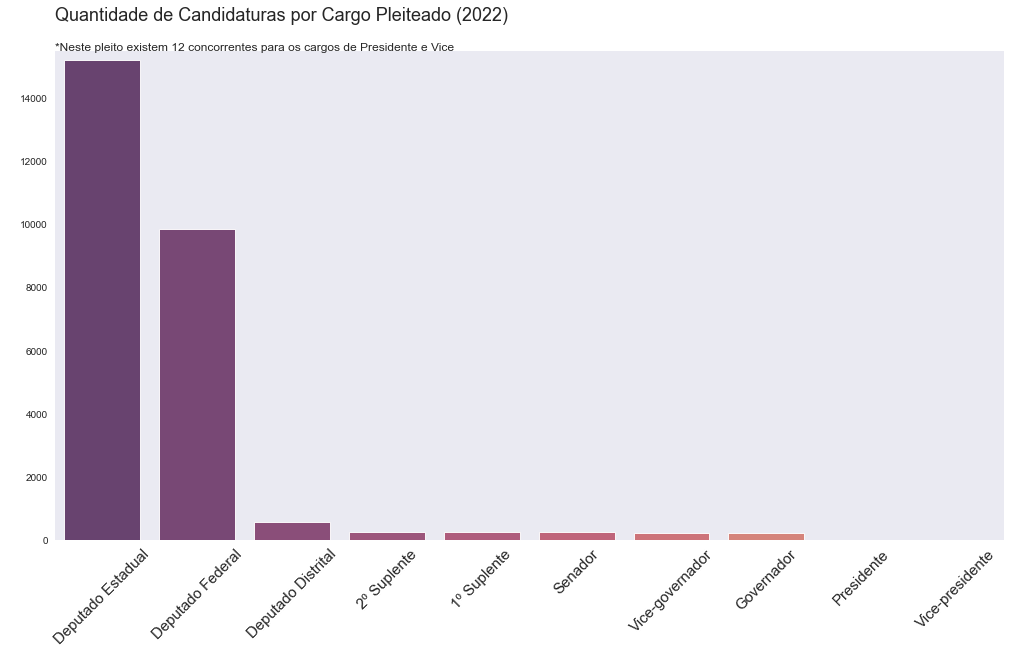

In [187]:
g1_cargo = sns.countplot(x = 'ds_cargo', data = dados, order=dados['ds_cargo'].value_counts().index, palette='flare_r', alpha = 0.9)
g1_cargo.figure.set_size_inches(17,9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Quantidade de Candidaturas por Cargo Pleiteado (2022)', fontsize = 18, loc='left', pad =30)
plt.text(x=-0.5, y=15500, s='*Neste pleito existem 12 concorrentes para os cargos de Presidente e Vice', fontsize=12, alpha=1)
plt.xticks(fontsize = 15)
plt.xticks(rotation = 45, fontsize = 15)
plt.ylim(0,15500)
sns.despine (left = True) # este comando retira as bordas do gráfico

Como esperado, a maior quantidade de candidaturas pertence ao cargo de deputado estadual. Os cargos de presidente e vice naturamente figuram com as menores quantidades.

Qual a distribuição de candidaturas por partido em 2022?

In [188]:
# Criando dados agrupados 
partidos_agrup = pd.DataFrame(dados['sg_partido'].value_counts().sort_values(ascending=False).reset_index())
partidos_agrup.rename(columns={'index' : 'Partido', 'sg_partido' : 'Quantidade'}, inplace=True)
partidos_agrup

,Partido,Quantidade
0,PL,1474
1,UNIÃO,1393
2,REPUBLICANOS,1339
3,MDB,1290
4,PDT,1276
5,PP,1246
6,PSB,1210
7,PTB,1195
8,PATRIOTA,1150
9,PODE,1080


Vale notar que nas eleições de 2022 ao todo 31 partidos irão disputar algum cargo político.

Graficamente, temos:

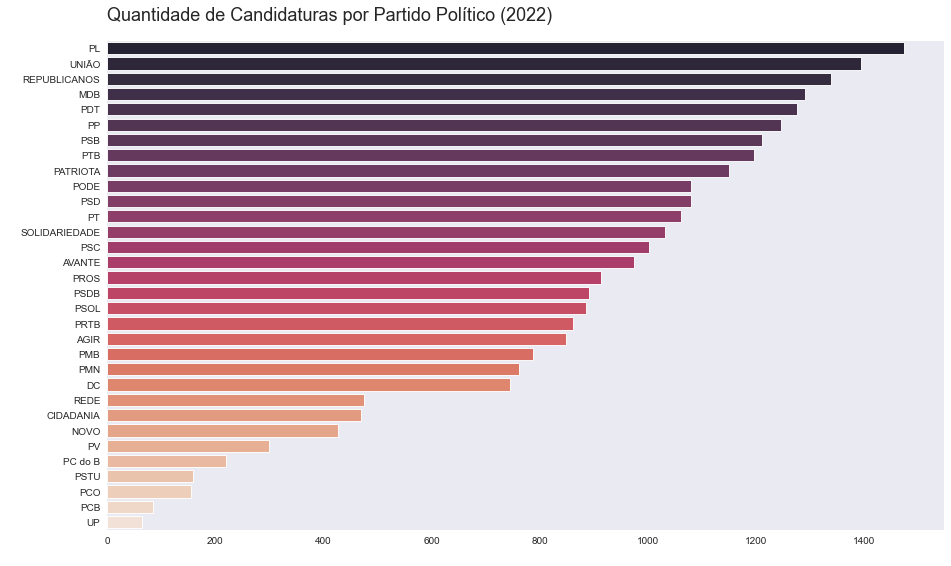

In [189]:
# Plotando Gráfico
g2_partidos = sns.countplot(y = 'sg_partido', data = dados, order=dados['sg_partido'].value_counts().index, palette='rocket', alpha = 0.9)
g2_partidos.figure.set_size_inches(15,9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Quantidade de Candidaturas por Partido Político (2022)', fontsize = 18, loc='left', pad =20)
sns.despine (left = True) 

Impressões:


O Partido Liberal (PL) do atual Presidente mantém o maior número de candidaturas, enquanto que a Unidade Popular (UP) apresenta a menor quantidade.


O Partido dos Trabalhadores (PT) que disputa as eleições presidenciais com o ex-presidente Lula aparece apenas na 12º colocação, mesmo tendo seu candidato figurando em 1º lugar nas intenções de voto.

Analisando a ocupação profissional dos candidatos, quais as 10 maiores declaradas ao TSE para as eleições de 2022?

In [190]:
# Filtrando dados de interesse
ocupacao_agrup = pd.DataFrame(dados['ds_ocupacao'].value_counts().head(16)).reset_index()
ocupacao_agrup

,index,ds_ocupacao
0,Outros,4532
1,Empresário,3311
2,Advogado,1781
3,Vereador,1010
4,Deputado,931
5,Administrador,839
6,Comerciante,810
7,Aposentado (Exceto Servidor Público),807
8,Policial Militar,762
9,Servidor Público Estadual,716


In [191]:
# Renomenado colunas de nosso novo dataframe
ocupacao_agrup = ocupacao_agrup.rename(columns={'index' : 'cargo', 'ds_ocupacao' : 'quantidade'})
ocupacao_agrup


,cargo,quantidade
0,Outros,4532
1,Empresário,3311
2,Advogado,1781
3,Vereador,1010
4,Deputado,931
5,Administrador,839
6,Comerciante,810
7,Aposentado (Exceto Servidor Público),807
8,Policial Militar,762
9,Servidor Público Estadual,716


In [192]:
# Retirando categoria 'outros' da contagem, pois ela agrega pouca informação
ocupacao_agrup = ocupacao_agrup.iloc[1:11] 
ocupacao_agrup

,cargo,quantidade
1,Empresário,3311
2,Advogado,1781
3,Vereador,1010
4,Deputado,931
5,Administrador,839
6,Comerciante,810
7,Aposentado (Exceto Servidor Público),807
8,Policial Militar,762
9,Servidor Público Estadual,716
10,Médico,624


Graficamente, temos:

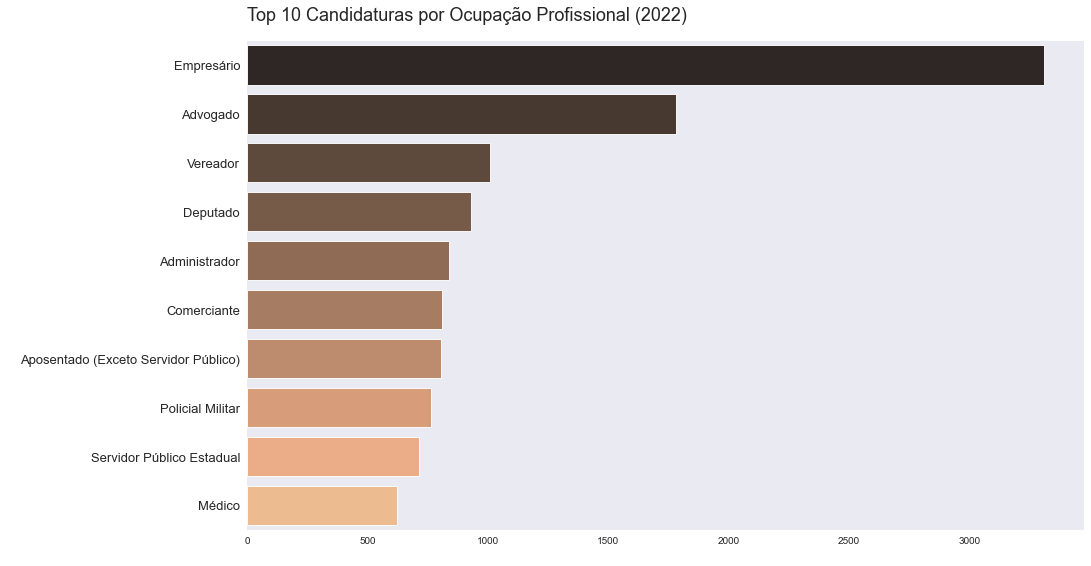

In [193]:
g1_ocup = sns.barplot(y='cargo', x = 'quantidade', data=ocupacao_agrup, orient='h', palette='copper', alpha = 0.9)
g1_ocup.figure.set_size_inches(15,9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.yticks(fontsize = 13)
plt.title('Top 10 Candidaturas por Ocupação Profissional (2022)', fontsize = 18, loc='left', pad =20)
sns.despine (left = True)

Algumas impressões:

1. A maior parte dos candidatos declarou-se como `empresários` e `advogados`. No agregado, seis das top 10 ocupações são do Setor Privado da Economia e quatro são ocupações Públicas.

2. Apenas cargos políticos de `deputado` e `vereador` aparecem no top 10.



Qual a proporção de Homens vs Mulheres na disputa pelos cargos?

In [194]:
# Criando dados de interesse
qtde_sexo = pd.DataFrame(dados.groupby(['ds_sexo']).size()).reset_index()
qtde_sexo.rename(columns= {0 : 'Quantidade', 'ds_sexo' : 'Sexo'}, inplace= True)
qtde_sexo['percentual'] = qtde_sexo['Quantidade'] / len(dados) * 100
qtde_sexo


,Sexo,Quantidade,percentual
0,Feminino,9313,34.694334
1,Masculino,17526,65.290765
2,Não divulgável,4,0.014901


Graficamente, temos:

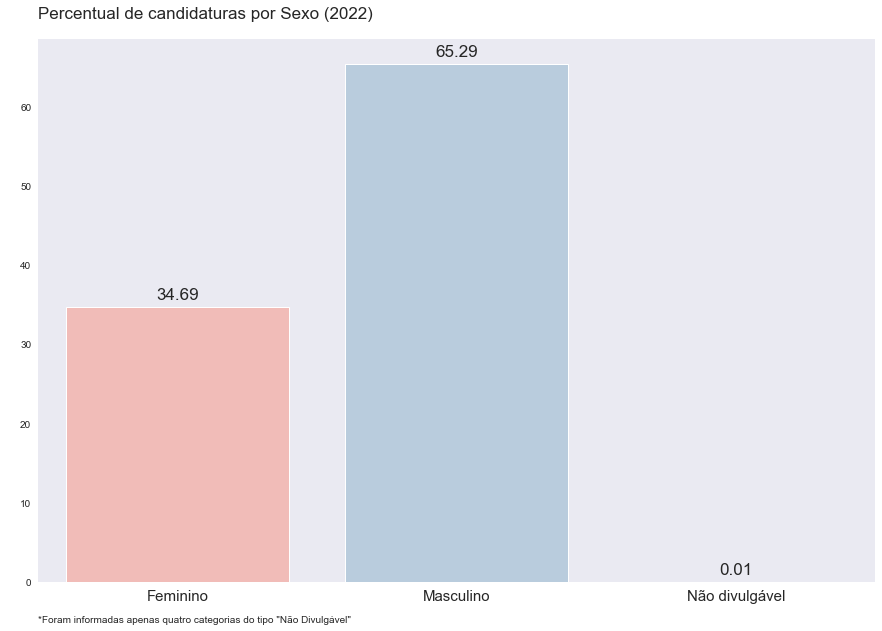

In [195]:
# Plotando visual

g3_sexo = sns.barplot(x = 'Sexo', y = 'percentual', data=qtde_sexo, palette="Pastel1", alpha  = 1)
g3_sexo.figure.set_size_inches(15, 10)
plt.title('Percentual de candidaturas por Sexo (2022)', fontsize = 17, loc='left', pad =20)
plt.text(x=-0.5, y=-5, s='*Foram informadas apenas quatro categorias do tipo "Não Divulgável"', fontsize=10, alpha=1)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 15)
sns.set_style('dark')
sns.despine (left = True)

# Criando laço para adicionar rótulos nas barras do gráfico
for p in g3_sexo.patches:
    height = p.get_height()
    g3_sexo.text(p.get_x()+p.get_width()/2., height+1, '{:1.2f}'.format((height)), ha='center', fontsize = 17)

Qual a distribuição das candidaturas entre as Raças Declaradas pelos pleiteantes?

In [196]:
raca_agrup = dados['ds_cor_raca'].value_counts().sort_values(ascending=False)
raca_agrup

Branca            12758
Parda              9731
Preta              3916
Indígena            182
Não Informado       137
Amarela             115
Não divulgável        4
Name: ds_cor_raca, dtype: int64

A maior parte dos candidatos se declarou como `Branca` enquanto que a menor parte autodeclara-se como `Amarela`

Plotado gráfico:

In [197]:
# Criando dados de interesse para calculo de percentual
qtde_raca = pd.DataFrame(dados.groupby(['ds_cor_raca']).size()).reset_index()
qtde_raca.rename(columns= {0 : 'Quantidade', 'ds_cor_raca' : 'Raça'}, inplace= True)
qtde_raca['percentual'] = qtde_raca['Quantidade'] / len(dados) * 100
qtde_raca.sort_values(inplace=True, by='percentual', ascending=False)
qtde_raca

,Raça,Quantidade,percentual
1,Branca,12758,47.528220
5,Parda,9731,36.251537
6,Preta,3916,14.588533
2,Indígena,182,0.678017
3,Não Informado,137,0.510375
0,Amarela,115,0.428417
4,Não divulgável,4,0.014901


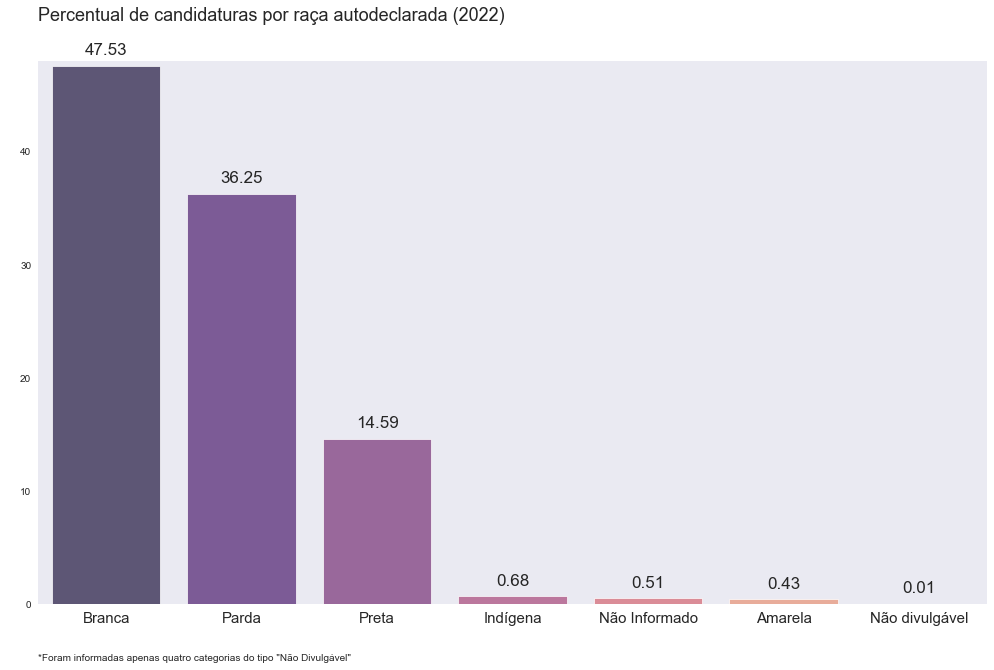

In [198]:
#Plotagem gráfica

g4_raca = sns.barplot(x = 'Raça', y = 'percentual', data=qtde_raca, palette="magma", alpha=0.7)
g4_raca.figure.set_size_inches(17,10)
plt.title('Percentual de candidaturas por raça autodeclarada (2022)', fontsize = 18, loc='left', pad =40)
plt.text(x=-0.5, y=-5, s='*Foram informadas apenas quatro categorias do tipo "Não Divulgável"', fontsize=10, alpha=1)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 15)
plt.ylim(0,48)
sns.despine (left = True)
sns.set_style('dark')

# Criando laço para adicionar rótulos nas barras do gráfico
for p in g4_raca.patches:
    height = p.get_height()
    g4_raca.text(p.get_x()+p.get_width()/2., height+1, '{:1.2f}'.format(height), ha='center', fontsize = 17)

As eleições de 2022 mantém o padrão das edições anteriores e também são marcadas por predominância de candidatos autodeclarados `brancos`.

Podemos avaliar também o perfil de escolaradidade dos candidatos:

In [199]:
escolaridade_agrup = dados['ds_grau_instrucao'].value_counts().sort_values(ascending=False)
escolaridade_agrup

Superior completo                14484
Ensino Médio completo             6801
Superior incompleto               2626
Ensino Fundamental completo       1306
Ensino Fundamental incompleto      725
Ensino Médio incompleto            692
Lê e escreve                       205
Não divulgável                       4
Name: ds_grau_instrucao, dtype: int64

Graficamente, temos:

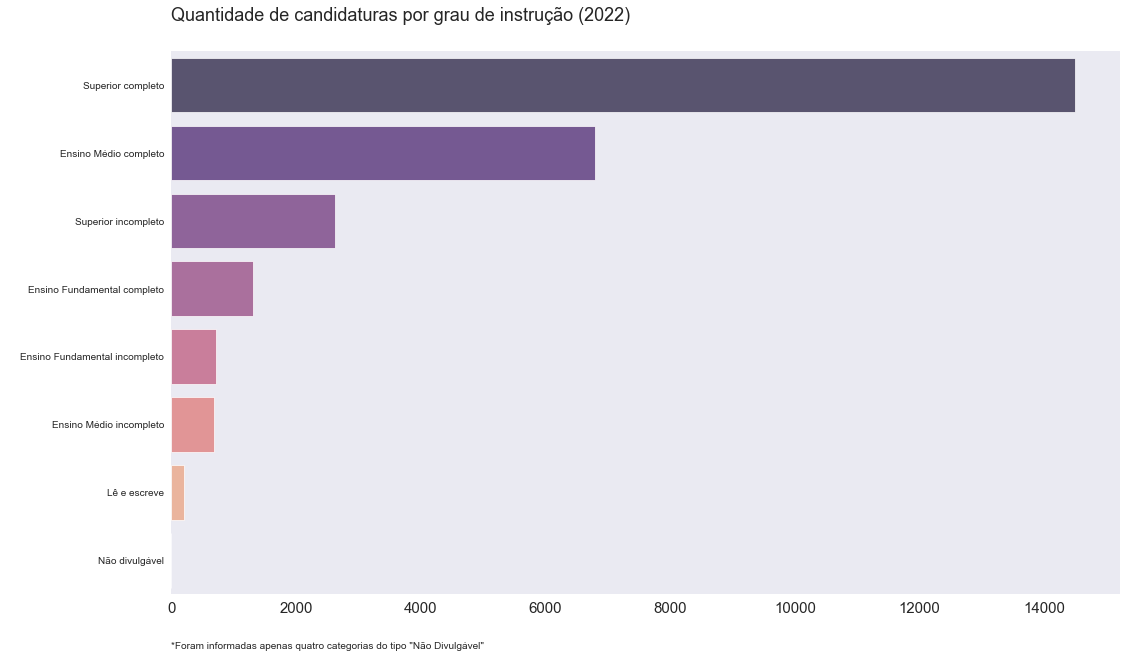

In [200]:
g5_escolaidade = sns.countplot(data=dados, y = 'ds_grau_instrucao', palette='magma', alpha = 0.7)
g5_escolaidade.figure.set_size_inches(17,10)
plt.title('Quantidade de candidaturas por grau de instrução (2022)', fontsize = 18, loc='left', pad = 30)
plt.text(x=0, y = 8.3, s='*Foram informadas apenas quatro categorias do tipo "Não Divulgável"', fontsize=10, alpha=1)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 15)
sns.despine (left = True)

Em relação aos Estados da Federação, como está a distribuição de candidaturas?

In [201]:
# Criando dados de interesse para calculo de percentual
qtde_uf = pd.DataFrame(dados.groupby(['sg_uf']).size()).reset_index()
qtde_uf.rename(columns= {0 : 'Quantidade', 'sg_uf' : 'Estado'}, inplace= True)
qtde_uf['percentual'] = qtde_uf['Quantidade'] / len(dados) * 100
qtde_uf.sort_values(inplace=True, by='percentual', ascending=False)
qtde_uf

,Estado,Quantidade,percentual
26,SP,3150,11.734903
19,RJ,2538,9.454979
11,MG,2367,8.817941
4,BA,1539,5.733338
18,PR,1478,5.506091
23,RS,1292,4.813173
9,GO,1176,4.381030
16,PE,1043,3.885557
14,PA,959,3.572626
6,CE,915,3.408710


In [202]:
# Retirando os candidatos que declararam os Estado como 'BR'

dados = dados.query('sg_uf != "BR"')

In [203]:
# Recriando nosso dataframe de interesse com os dados ja filtrados
qtde_uf1 = pd.DataFrame(dados.groupby(['sg_uf']).size()).reset_index()
qtde_uf1.rename(columns= {0 : 'Quantidade', 'sg_uf' : 'Estado'}, inplace= True)
qtde_uf1['percentual'] = qtde_uf1['Quantidade'] / len(dados) * 100
qtde_uf1.sort_values(inplace=True, by='percentual', ascending=False)
qtde_uf1
qtde_uf1

,Estado,Quantidade,percentual
25,SP,3150,11.745404
18,RJ,2538,9.463440
10,MG,2367,8.825832
4,BA,1539,5.738469
17,PR,1478,5.511018
22,RS,1292,4.817480
8,GO,1176,4.384951
15,PE,1043,3.889034
13,PA,959,3.575823
5,CE,915,3.411760


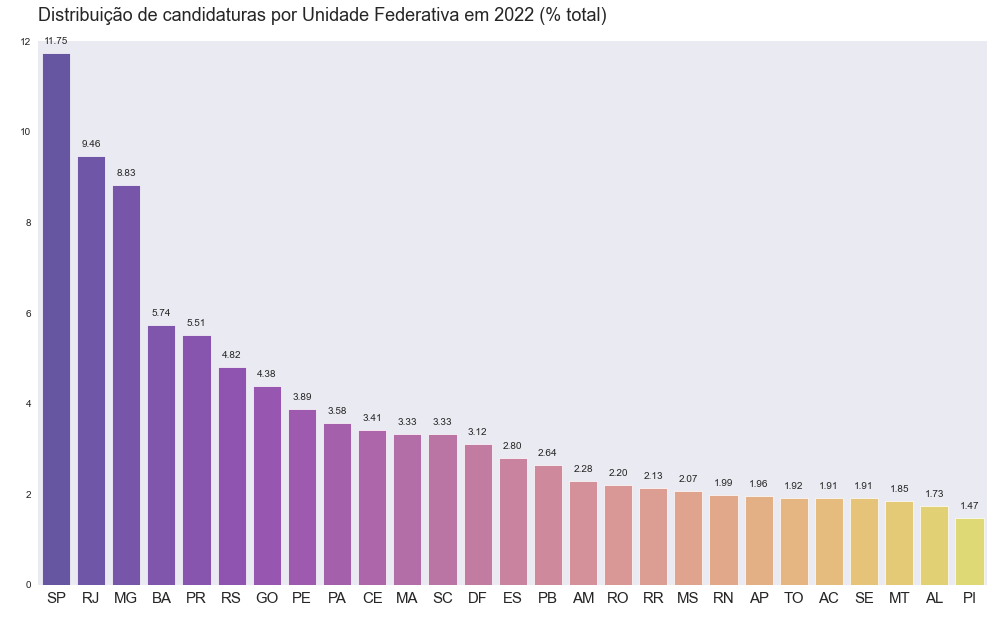

In [204]:
# Plotando gráfico

g6_uf = sns.barplot(x = 'Estado', y = 'percentual', data=qtde_uf1, palette="plasma", alpha=0.7)
g6_uf.figure.set_size_inches(17,10)
plt.title('Distribuição de candidaturas por Unidade Federativa em 2022 (% total)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.ylim(0,12)
plt.xticks(fontsize = 15)
sns.despine (left = True)
sns.set_style('dark')

# Criando laço para adicionar rótulos nas barras do gráfico
for p in g6_uf.patches:
    height = p.get_height()
    g6_uf.text(p.get_x()+p.get_width()/2., height+0.2, '{:1.2f}'.format(height), ha='center')

Como era de se esperar, os Estados mais populosos concentram a maior parte das candidaturas, notadamente São Paulo, Rio de Janeiro e Minas Gerais.

Por fim, gostariamos de avaliar a proporção de candidatos que estão disputando reeleição ou não. Logo, temos:

In [205]:
reeleicao = pd.DataFrame(dados.groupby(['st_reeleicao']).size()).reset_index()
reeleicao.rename(columns= {0 : 'Quantidade', 'st_reeleicao' : 'Status'}, inplace= True)
reeleicao['percentual'] = reeleicao['Quantidade'] / len(dados) * 100
reeleicao.sort_values(inplace=True, by='percentual', ascending=False)
reeleicao

,Status,Quantidade,percentual
0,N,25661,95.682166
1,S,1158,4.317834


In [206]:
# Reneomeando registros na coluna Status do dataframe anterior

reeleicao.loc[reeleicao['Status'] == 'S', ['Status']] = "Reeleição"
reeleicao.loc[reeleicao['Status'] == 'N', ['Status']] = "Não - Reeleição"


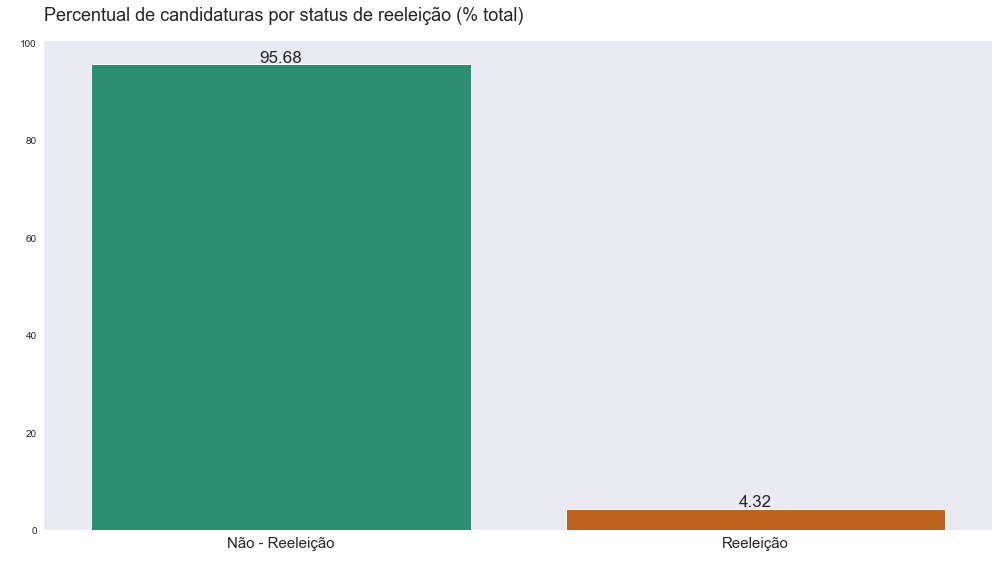

In [207]:
# Plotagem Gráfica

g7_reeleicao = sns.barplot(x = 'Status', y = 'percentual', data=reeleicao, palette="Dark2")
g7_reeleicao.figure.set_size_inches(17,9)
plt.title('Percentual de candidaturas por status de reeleição (% total)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 15)
sns.despine (left = True)
sns.set_style('dark')

# Criando laço para adicionar rótulos nas barras do gráfico
for p in g7_reeleicao.patches:
    height = p.get_height()
    g7_reeleicao.text(p.get_x()+p.get_width()/2., height+0.4, '{:1.2f}'.format(height), ha='center', fontsize = 17)

A grande maioria dos mais de 20 mil candidatos estão tentando pleitear um cargo pela primeira vez ou tentando um novo cargo.

Obs: 

1. Parte desta grande disparidade é explicada porque evidentemente um determinado político que já tenha um cargo pode estar tentando migrar para uma nova carreira, o que o coloca no grupo `Não-Reeleição`. Exemplo: Um deputado estadual que está concorrendo a deputado federal em 2022 não será contabilizado como `Reeleição`.

2. Para fazer o cruzamento entre um político que já possui um cargo e está tentando um novo seria necessário cruzar com outras bases de dados que tragam informações de carreira política. Não é este nosso objetivo aqui.

3. Outra explicação é que estamos olhando para toda a população de candidaturas no Brasil. Como qualquer cidadão, dada algumas exigências mínimas podem se canditatar aos cargos, é natural observamos tais diferenças.

Qual partido lançou mais candidaturas para Governador?

In [208]:
# Identificando dados de interesse
partido_gov = dados.query('ds_cargo == "Governador"').groupby(['sg_partido']).size().sort_values(ascending=False).head(10).reset_index()
partido_gov

,sg_partido,0
0,PSOL,20
1,PSTU,17
2,PCO,15
3,PL,14
4,PT,13
5,UNIÃO,12
6,PCB,11
7,PSD,11
8,PDT,10
9,MDB,9


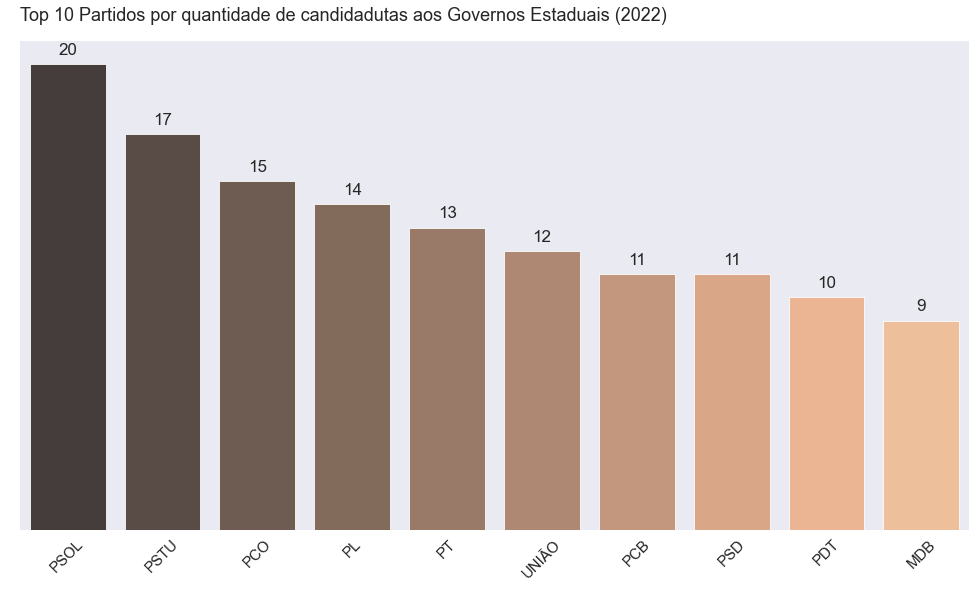

In [209]:
# Plotando Gráfico

g8_partido_gov = sns.barplot(x = 'sg_partido', y = 0, data=partido_gov, palette="copper", alpha = 0.8)
g8_partido_gov.figure.set_size_inches(17,9)
plt.title('Top 10 Partidos por quantidade de candidadutas aos Governos Estaduais (2022)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(( )) 
sns.despine (left = True)
sns.set_style('dark')

# Criando laço para adicionar rótulos nas barras do gráfico
for p in g8_partido_gov.patches:
    height = p.get_height()
    g8_partido_gov.text(p.get_x()+p.get_width()/2., height+0.4, '{:1.0f}'.format(height), ha='center', fontsize = 17)

Imrpessões:


1. Pelo gráfico podemos observar que partidos à esquerda do espectro ideológico lançaram mais candidaturas aos Governos Estaduais. 

2. Do top 10, sete partidos estão posionados mais à esquerda no espectro político do sistema brasileiro (exceto União e MDB).

Podemos verificar estas distribuições para os cargos do Legislativo também

1. Verificando para Deputados Estaduais

In [210]:
partido_dep_estd = dados.query('ds_cargo == "Deputado Estadual"').groupby(['sg_partido']).size().sort_values(ascending=False).head(10).reset_index()
partido_dep_estd

,sg_partido,0
0,PL,903
1,UNIÃO,830
2,REPUBLICANOS,794
3,MDB,766
4,PDT,728
5,PSB,719
6,PP,703
7,PTB,678
8,PATRIOTA,651
9,PT,625


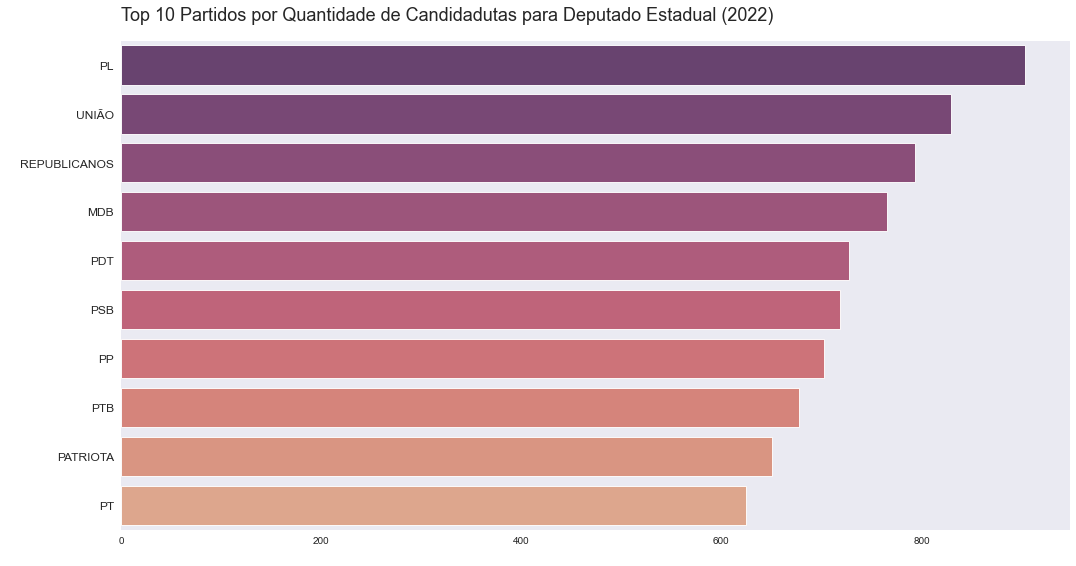

In [211]:
# Plotando Gráfico
g9_partido_dep_estad = sns.barplot(y = 'sg_partido', x = 0, data=partido_dep_estd, palette="flare_r", orient='h', alpha = 0.9)
g9_partido_dep_estad.figure.set_size_inches(17,9)
plt.title('Top 10 Partidos por Quantidade de Candidadutas para Deputado Estadual (2022)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.yticks(fontsize = 12)
sns.despine (left = True)

Impressões:

1. Para deputados estaduais o cenário muda, e agora pdoemos ver maior presença de partidos mais à direita e dos partidos que integram pela denominação de "centrão".

2. Agora, do top 10, temos apenas 4 partidos posisionaods mais à esquerda do espectro político (PDT, PSB, PTB e PT).

2. Analisando cargo de deputado federal, temos:

In [212]:
partido_dep_fed = dados.query('ds_cargo == "Deputado Federal"').groupby(['sg_partido']).size().sort_values(ascending=False).head(10).reset_index()
partido_dep_fed

,sg_partido,0
0,REPUBLICANOS,496
1,UNIÃO,487
2,PP,478
3,PL,470
4,PODE,467
5,PTB,458
6,PDT,458
7,MDB,455
8,PATRIOTA,451
9,PSB,428


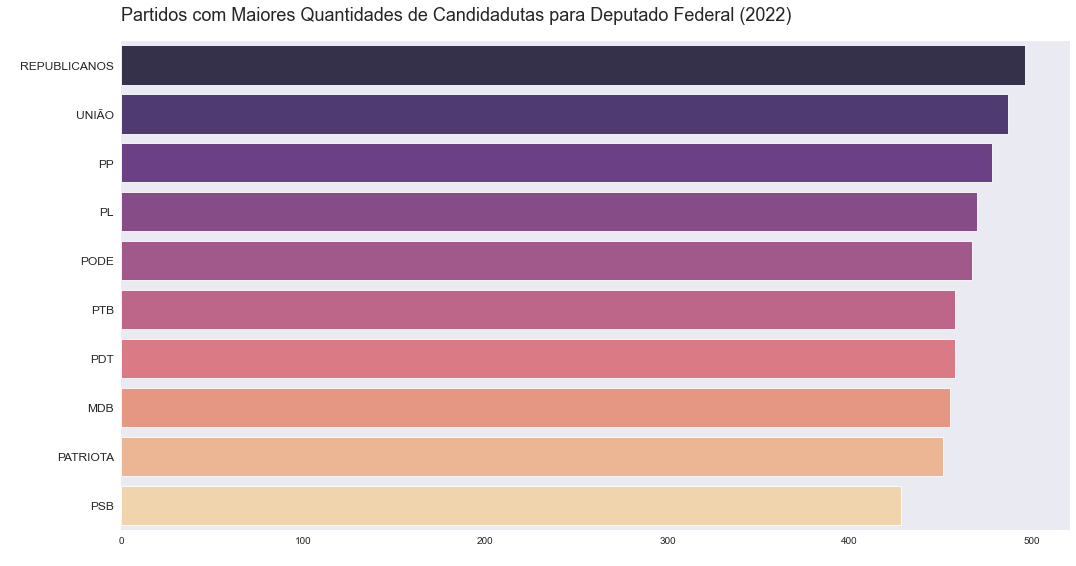

In [213]:
g10_partido_dep_fed = sns.barplot(y = 'sg_partido', x = 0, orient='h', data=partido_dep_fed, palette="magma", alpha = 0.85)
g10_partido_dep_fed.figure.set_size_inches(17,9)
plt.title('Partidos com Maiores Quantidades de Candidadutas para Deputado Federal (2022)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.yticks(fontsize = 12)
sns.despine (left = True)

Impressões:

1. Para deputados federais o cenário é relativamente similiar para cargo de deputados estaduais, com ligeira mudança entre os partidos com mais candidaturas.

2. No entanto, o contexto permanece: maior prevalência de partidos pela denominação "centrão".

3. Para partidos de esquerda temos agora apenas 3 entre o top 10: PTB, PDT e PSB.

3. Para finalizar, iremos tambéma analisar a distribuição para o Senado Federal

In [214]:
partido_senad= dados.query('ds_cargo == "Senador"').groupby(['sg_partido']).size().sort_values(ascending=False).head(10).reset_index()
partido_senad

,sg_partido,0
0,PSOL,20
1,PL,17
2,PSTU,14
3,PP,13
4,PCO,13
5,PDT,12
6,PSB,11
7,PT,11
8,PSD,10
9,DC,10


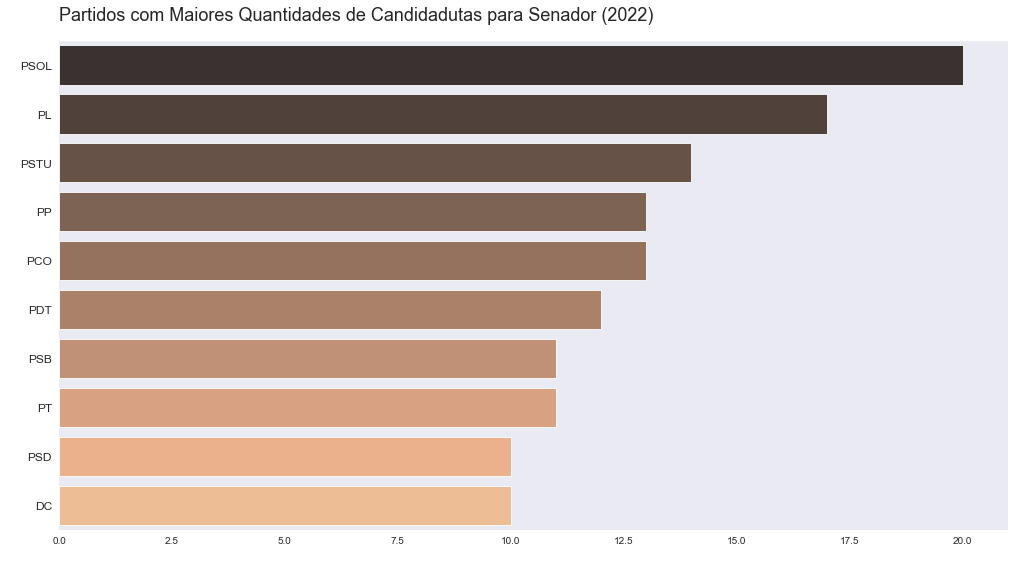

In [215]:
g11_partido_senad = sns.barplot(y = 'sg_partido', x = 0, orient='h', data=partido_senad, palette="copper", alpha = 0.85)
g11_partido_senad.figure.set_size_inches(17,9)
plt.title('Partidos com Maiores Quantidades de Candidadutas para Senador (2022)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.yticks(fontsize = 12)
sns.despine (left = True)

Impressões:

1. No caso de Senador o quadro é similiar ao que temos para Governador.

2. Aqui temos predonimância de partidos de esquerda com candidaturas ao senador federal, quadro bem divergente para os cargos de Deputados.

3. Para partidos que integram o denominado "centrão" temos agora apenas 3 entre o top 10 com todos mais posicionados à direta: DC, PP e PL.

Como está a distribuição de sexo declarado entre os partidos?

In [216]:
partido_sexo = pd.DataFrame(dados.groupby(['sg_partido', 'ds_sexo']).size()).reset_index()
partido_sexo.rename(columns={0 : 'quantidade'}, inplace=True)
partido_sexo

,sg_partido,ds_sexo,quantidade
0,AGIR,Feminino,281
1,AGIR,Masculino,567
2,AVANTE,Feminino,327
3,AVANTE,Masculino,646
4,CIDADANIA,Feminino,160
...,...,...,...
62,SOLIDARIEDADE,Masculino,679
63,UNIÃO,Feminino,475
64,UNIÃO,Masculino,916
65,UP,Feminino,40


In [217]:
# Criando coluna de percentual para cada grupo
partido_sexo['pct'] = 100 * partido_sexo['quantidade'] / partido_sexo.groupby('sg_partido')['quantidade'].transform('sum')
partido_sexo

,sg_partido,ds_sexo,quantidade,pct
0,AGIR,Feminino,281,33.136792
1,AGIR,Masculino,567,66.863208
2,AVANTE,Feminino,327,33.607400
3,AVANTE,Masculino,646,66.392600
4,CIDADANIA,Feminino,160,34.115139
...,...,...,...,...
62,SOLIDARIEDADE,Masculino,679,65.858390
63,UNIÃO,Feminino,475,34.148095
64,UNIÃO,Masculino,916,65.851905
65,UP,Feminino,40,63.492063


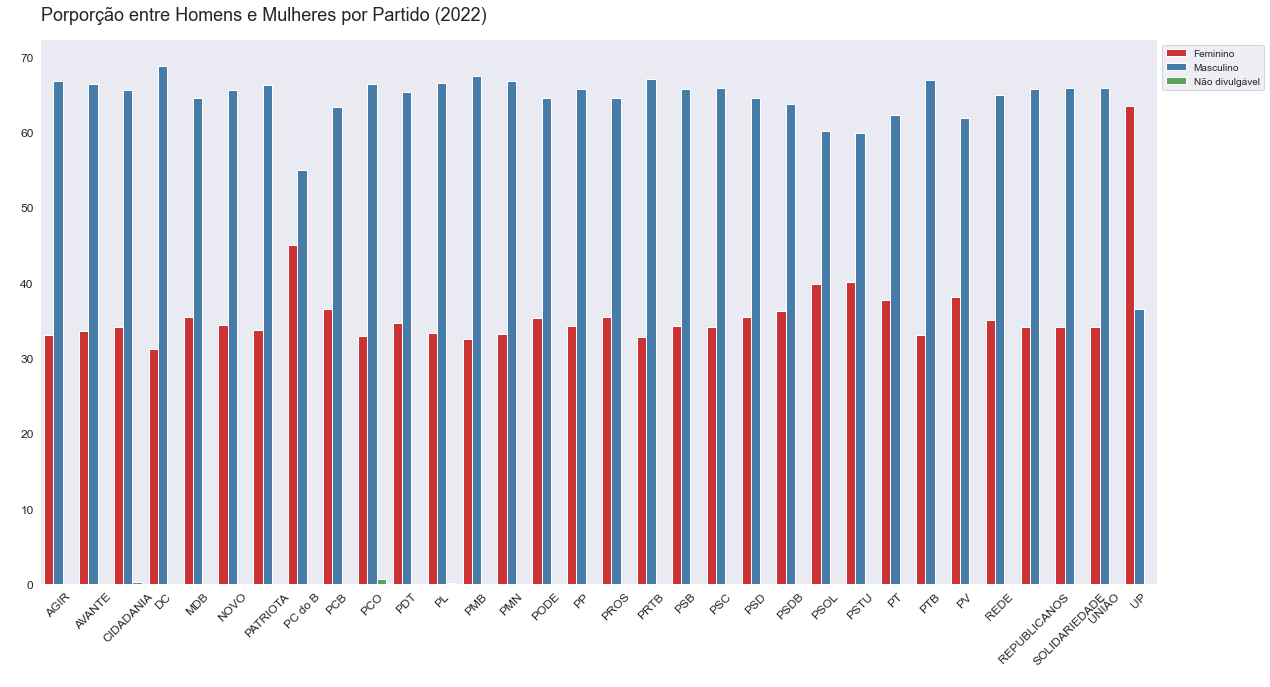

In [218]:
g11_part_sexo = sns.barplot(x = 'sg_partido', y = 'pct', hue='ds_sexo', data=partido_sexo, palette="Set1")
g11_part_sexo.figure.set_size_inches(20,10)
plt.title('Porporção entre Homens e Mulheres por Partido (2022)', fontsize = 18, loc='left', pad =20)
plt.ylabel(' ')
plt.xlabel(' ')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 45)
sns.despine (left = True)
plt.legend(bbox_to_anchor = (1,1))

# Clusterização com Kmeans:

Agora nosso objetivo é identificar partidos que sejam similares quanto sua diversificação de `grau de instrução` e `raça/cor da pele`. Para tanto:

1. Precisaremos de um novo conjunto de dados agregados por partido com seus respectivos percentuais raça declarada (iremos trabalhar com grupos autodeclarados Brancos e Pretos), escolaridade e algumas outras medidas.

2. Posteriormente iremos rodar um algoritmo de agrupamento para verificar as similaridades entre os partidos dentre as métricas (percentual de `brancos` e percentual de `superior completo`).

4. Finalmente iremos plotar um grafico de dispersão com os grupos identificados

In [219]:
# Relembrando nosso dataset original
dados.head()

,ds_cargo,nm_coligacao,ds_cor_raca,ds_estado_civil,ds_grau_instrucao,nm_ue,ds_ocupacao,st_reeleicao,ds_sexo,sg_partido,sg_uf
0,1º Suplente,PELA BAHIA;PELO BRASIL,Branca,Casado(a),Superior completo,BAHIA,Contador,N,Masculino,PT,BA
1,1º Suplente,A FORCA DO POVO,Branca,Casado(a),Superior completo,AMAZONAS,Advogado,N,Feminino,PSDB,AM
2,1º Suplente,A FORÇA DO BEM,Parda,Casado(a),Superior completo,MATO GROSSO,Servidor Público Federal,N,Masculino,DC,MT
3,1º Suplente,A FORÇA DO POVO,Parda,Casado(a),Superior completo,PIAUÍ,Sociólogo,N,Feminino,PT,PI
4,1º Suplente,A PARAIBA TEM PRESSA DE SER FELIZ,Parda,Casado(a),Superior completo,PARAÍBA,Deputado,N,Masculino,PT,PB


Iremos utilizar a linguagem SQL para construir nosso dataset de interesse

In [220]:
# Importando modulo de SQL para Python
import pandasql as ps

In [222]:
# Construindo query com tabela de interesse

query = """ 
SELECT sg_partido,
       count (*) as qt_candidados,
       CAST(SUM(CASE WHEN ds_sexo = 'Masculino' THEN 1 ELSE 0 END) as float) / count(*) * 100 AS pct_masc,
       CAST(SUM(CASE WHEN ds_sexo = 'Feminino' THEN 1 ELSE 0 END ) as float) / count(*) * 100 AS pct_fem,
       CAST(SUM(CASE WHEN ds_cor_raca = 'Preta' THEN 1 ELSE 0 END ) as float) / count(*) * 100 AS pct_preta,
       CAST(SUM(CASE WHEN ds_cor_raca = 'Branca' THEN 1 ELSE 0 END ) as float) / count(*) * 100 AS pct_branca,
       CAST(SUM(CASE WHEN ds_grau_instrucao = 'Superior completo' THEN 1 ELSE 0 END ) as float) / count(*) * 100 AS pct_superior_completo  
FROM dados
GROUP BY sg_partido

"""

In [223]:
# Lendo os dados
df = ps.sqldf(query, locals())
df

,sg_partido,qt_candidados,pct_masc,pct_fem,pct_preta,pct_branca,pct_superior_completo
0,AGIR,848,66.863208,33.136792,14.622642,41.509434,35.966981
1,AVANTE,973,66.392600,33.607400,13.669065,43.062693,45.734841
2,CIDADANIA,469,65.671642,34.115139,14.285714,43.923241,55.863539
3,DC,743,68.775236,31.224764,15.746972,45.491252,33.916555
4,MDB,1289,64.546160,35.453840,13.809154,47.633825,57.564003
5,NOVO,424,65.566038,34.433962,4.481132,77.594340,82.547170
6,PATRIOTA,1150,66.260870,33.739130,12.434783,46.695652,45.913043
7,PC do B,220,55.000000,45.000000,22.272727,39.090909,61.818182
8,PCB,82,63.414634,36.585366,23.170732,53.658537,67.073171
9,PCO,155,66.451613,32.903226,20.645161,52.258065,35.483871


Iremos verificar a similaridade entre os partido a partir de seus percentuais de `raça branca` e `superior completo`. Desta forma, queremos analisar se existem partidos com uma diferença significativa entre o perfil de cor e escolaridade declarada pelos seus candidatos. Voltaremos a linguagem Python para construção do modelo.

In [224]:
# Importando módulo para clusterização
from sklearn import cluster

In [225]:
# Seleciando as características a serem passadas para o algoritmo construir o cluster
caracteristicas = ['pct_branca', 'pct_superior_completo']

In [226]:
# Criando modelo

modelo = cluster.KMeans(n_clusters=5)

# Realizando o fitting

modelo.fit(df[caracteristicas])

# Colocando o resultado dos agrupamentos na tabela df

df['cluster'] = modelo.labels_

In [227]:
# Conferindo resultado
df[caracteristicas+['sg_partido', 'cluster']]

,pct_branca,pct_superior_completo,sg_partido,cluster
0,41.509434,35.966981,AGIR,1
1,43.062693,45.734841,AVANTE,3
2,43.923241,55.863539,CIDADANIA,4
3,45.491252,33.916555,DC,1
4,47.633825,57.564003,MDB,0
5,77.594340,82.547170,NOVO,2
6,46.695652,45.913043,PATRIOTA,3
7,39.090909,61.818182,PC do B,4
8,53.658537,67.073171,PCB,0
9,52.258065,35.483871,PCO,1


Quantos partidos existem em cada cluster?

In [228]:
df.groupby(['cluster']).size()

cluster
0    12
1     4
2     1
3     9
4     6
dtype: int64

Qual a média dos percentuais de Brancos e Superior Completo por cluster?

In [251]:
df.groupby(['cluster'])[caracteristicas].mean().sort_values(by='pct_superior_completo')

,pct_branca,pct_superior_completo
cluster,,
1,44.854058,35.856287
3,44.343984,46.499686
4,41.337536,58.960970
0,50.682788,61.050055
2,77.594340,82.547170


Podemos perceber que o cluster 2 possui altíssimas médias entre as características selecionadas. Também vimos no bloco anterior que existe apenas um partido neste cluster.

In [236]:
# Verificando partido do cluster 2:

df.query('cluster == 2')

,sg_partido,qt_candidados,pct_masc,pct_fem,pct_preta,pct_branca,pct_superior_completo,cluster
5,NOVO,424,65.566038,34.433962,4.481132,77.59434,82.54717,2


O partido Novo figura com a maior porcentagem de candidatos autodeclarados `brancos` e com `ensino superior` compondo sozinho o agrupamento 2. Isto significa que este partido está mais distante dos demais em relação as características selecionadas.

Agora queremos verificar quais partidos integram cada grupo de cluster gerado:

In [231]:
df[df['cluster'] == 4]

,sg_partido,qt_candidados,pct_masc,pct_fem,pct_preta,pct_branca,pct_superior_completo,cluster
2,CIDADANIA,469,65.671642,34.115139,14.285714,43.923241,55.863539,4
7,PC do B,220,55.000000,45.000000,22.272727,39.090909,61.818182,4
10,PDT,1274,65.306122,34.693878,19.073783,45.447410,55.808477,4
22,PSOL,886,60.158014,39.841986,36.230248,35.327314,58.126411,4
23,PSTU,157,59.872611,40.127389,38.216561,42.675159,66.242038,4
27,REDE,474,64.978903,35.021097,18.354430,41.561181,55.907173,4


O cluster 4 em sua esssência são partidos de menor porte da ala de esquerda ou progressista do espectro. Com base nas suas médias, é um grupo  com menor % de `brancos` nos seus quadros.

In [237]:
df[df['cluster'] == 3]

,sg_partido,qt_candidados,pct_masc,pct_fem,pct_preta,pct_branca,pct_superior_completo,cluster
1,AVANTE,973,66.392600,33.607400,13.669065,43.062693,45.734841,3
6,PATRIOTA,1150,66.260870,33.739130,12.434783,46.695652,45.913043,3
12,PMB,788,67.512690,32.487310,19.035533,38.832487,42.131980,3
16,PROS,911,64.544457,35.455543,17.124040,44.676180,44.456641,3
17,PRTB,861,67.131243,32.868757,11.498258,44.483159,46.109175,3
19,PSC,1002,65.868263,34.131737,13.273453,45.009980,45.109780,3
25,PTB,1193,66.974015,33.025985,9.555742,45.599329,51.047779,3
29,SOLIDARIEDADE,1031,65.858390,34.141610,13.676043,49.466537,48.787585,3
31,UP,63,36.507937,63.492063,33.333333,41.269841,49.206349,3


Já o cluster 3 é composto majoritariamente por partidos chamados de 'centrão' pela mídia. Este grupo apresenta a 2º menor taxa de `ensino_superior` e `branca` como principal característica.

Sobre o cluster 1, composto por dois partidos de esquerda e dois partidos de direita e figuram com a menor taxa de `ensino superior`

In [233]:
df[df['cluster'] == 1]

,sg_partido,qt_candidados,pct_masc,pct_fem,pct_preta,pct_branca,pct_superior_completo,cluster
0,AGIR,848,66.863208,33.136792,14.622642,41.509434,35.966981,1
3,DC,743,68.775236,31.224764,15.746972,45.491252,33.916555,1
9,PCO,155,66.451613,32.903226,20.645161,52.258065,35.483871,1
13,PMN,762,66.797900,33.202100,14.960630,40.157480,38.057743,1


Por fim, temos o cluster 0 caracterizado pela 2º maior média em relação ao `ensino superior`. Neste grupo figuram alguns partidos tradicionais da política nacional, como PT, PSDB, MDB e mais recentemente o proprio PL

In [234]:
df[df['cluster'] == 0]

,sg_partido,qt_candidados,pct_masc,pct_fem,pct_preta,pct_branca,pct_superior_completo,cluster
4,MDB,1289,64.546160,35.453840,13.809154,47.633825,57.564003,0
8,PCB,82,63.414634,36.585366,23.170732,53.658537,67.073171,0
11,PL,1472,66.508152,33.355978,7.608696,54.347826,60.461957,0
14,PODE,1080,64.629630,35.370370,11.111111,50.277778,55.740741,0
15,PP,1246,65.730337,34.269663,10.995185,52.086677,59.711075,0
18,PSB,1209,65.756824,34.243176,17.452440,47.642680,59.884202,0
20,PSD,1079,64.504171,35.495829,9.360519,56.997220,60.055607,0
21,PSDB,889,63.779528,36.220472,10.461192,51.968504,58.830146,0
24,PT,1060,62.264151,37.735849,27.169811,46.886792,72.075472,0
26,PV,299,61.872910,38.127090,10.702341,46.822742,61.204013,0


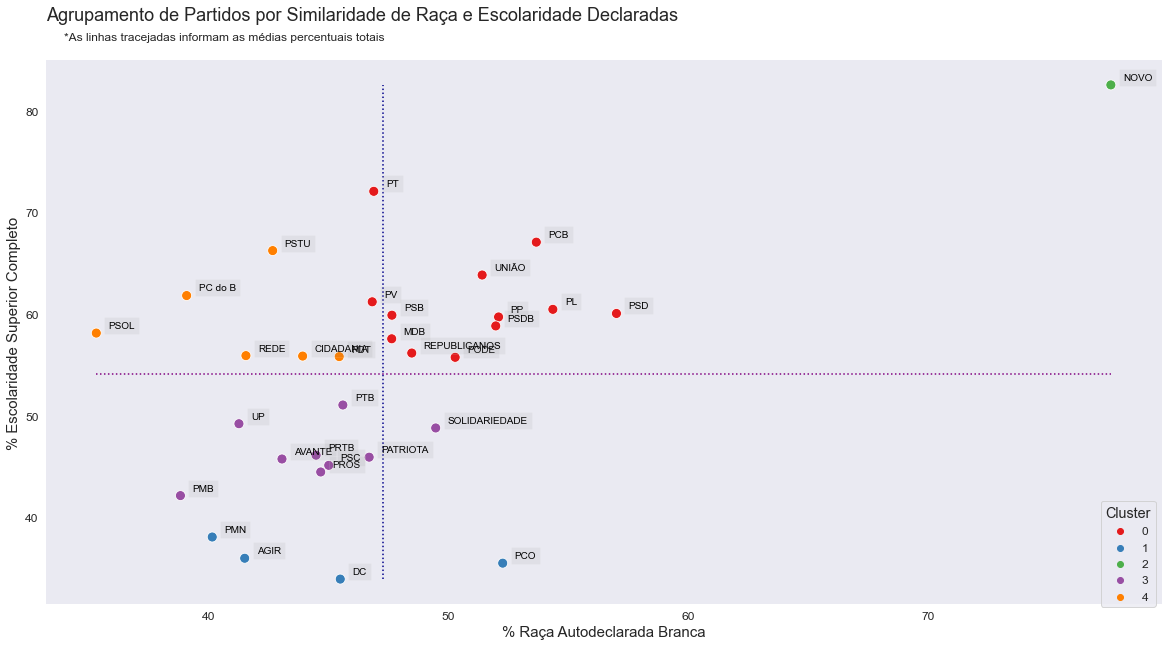

In [256]:
# Plotando Gráfico

g12_cluster = sns.scatterplot(x='pct_branca', y = 'pct_superior_completo', data = df, hue = 'cluster', palette='Set1', s = 100)
g12_cluster.figure.set_size_inches(20,10)
plt.title('Agrupamento de Partidos por Similaridade de Raça e Escolaridade Declaradas', fontsize = 18, loc='left', pad =40)
plt.ylabel('% Escolaridade Superior Completo',fontsize = 15)
plt.xlabel('% Raça Autodeclarada Branca',fontsize = 15)
# Criando linhas verticais e horizontais com base na média
plt.vlines(df['pct_branca'].mean(),df['pct_superior_completo'].min(),df['pct_superior_completo'].max(), colors='darkblue', linestyles='dotted')
plt.hlines(df['pct_superior_completo'].mean(),df['pct_branca'].min(),df['pct_branca'].max(),colors='purple', linestyles='dotted')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.legend(bbox_to_anchor = (1, 0.2), title="Cluster", fontsize = 'large', title_fontsize = 'x-large')
sns.despine (left = True)
plt.plot(markersize=30)
# Adicionando subtítulo
plt.text(x=34, y=87, s='*As linhas tracejadas informam as médias percentuais totais', fontsize=12, alpha=1)
# Criando laço para adicionar labels nos pontos do gráfico
for i in range(df.shape[0]):
 plt.text(x=df.pct_branca[i]+0.5,y=df.pct_superior_completo[i]+0.5,s=df.sg_partido[i], 
          fontdict=dict(color='black',size=10), bbox=dict(facecolor='grey',alpha=0.1))

Interpretando os resultados:

1. Podemos inferir que os agrupamentos detectados pelo algoritomo de `Kmeans` com mais diversidade em relação as características sociais dos seus quadros são aqueles localizados no quadrante inferior esquerdo: menores médias percentuais de autodeclarados brancos com ensino superior.

2. Esta inferência parte da própria análise do dataset: existem outras 6 categorias para escolaridade e 5 categorias para raça/cor de pele.

3. O gráfico mostra que os clusters que poderiam ser considerados como "partidos mais diversos entre si" são os agrupamentos 1 e 3 (cores azul e roxo, respectivamente)

## Considerações Finais

O perfil dos candidatos nas eleições pode ser resumido nos seguintes pontos:

1. O partido com maior quantidade de candidaturas é o PL, partido do atual Presidente da República.

2. A maior concentração de candidatos gravita em torno de deputados estaduais.

3. Os Estados mais populosos (SP, RJ e MG) apresentam a maior quantidade absoluta de candidatos.

4. Os candidatos em sua maioria são homens ( > 60%), declaradamente brancos ( > 47%), provenientes do ensino superior.

5. As profissões mais comuns dos candidatos são Empresários, Advogados e Cargos Políticos (vereadores e deputados)

6. Partidos mais à direita ou que integram o denominado "centrão" pela mídia lançam mais candidaturas para os cargos de Deputados Estaduais e Federais quando olhamos para o top 10.

7. Enquanto isto, partidos de esquerda e centro-esquerda lançam mais candidatos ao Governo Estadual e Senado quando olhamos também para o top 10.